# extract log

In [5]:
# coding=utf-8
# 该文件用来提取训练log，去除不可解析的log后使log文件格式化，生成新的log文件供可视化工具绘图
 
import inspect
import os
import random
import sys
def extract_log(log_file,new_log_file,key_word):
    with open(log_file, 'r') as f:
        with open(new_log_file, 'w') as train_log:
            i = 0
            for line in f:
#                 print('line: ', line)
        # 去除多gpu的同步log
                if 'Syncing' in line:
                    continue
        # 去除除零错误的log
                if 'nan' in line:
                    continue
                if key_word in line:
                    train_log.write(line)
                    i = i + 1
#             print('{} lines: {}').format(key_word, i)
    f.close()
    train_log.close()
    
extract_log(r'/media/speech70809/santynode2/trainer.log',r'/media/speech70809/santynode2/train_log_loss.txt','Epoch')
# extract_log('trainer.log','train_log_iou.txt','IOU')

# ————————————————
# 版权声明：本文为CSDN博主「dspeia」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
# 原文链接：https://blog.csdn.net/qq_34806812/article/details/81459982

# loss visulization

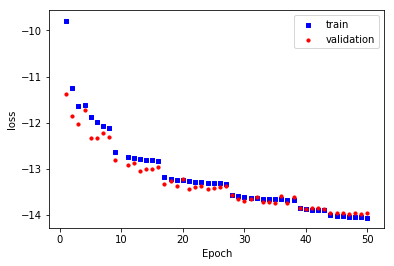

In [7]:
#!/usr/bin/python
#coding=utf-8
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

startEpoch = 0
endEpoch = 200
with open(r'/media/speech70809/santynode2/train_log_loss.txt', 'r') as f:
    epoch = []
    train_loss = []
    valid_loss = []
    for lineNum, line in enumerate(f):
        try:
            if lineNum < 10:
                epoch.append(int(line.split(' ')[11].split(':')[0]))
                train_loss.append(float(line.split(' ')[14].split('(')[0]))
                valid_loss.append(float(line.split(' ')[18].split('(')[0]))
            else:

                epoch.append(int(line.split(' ')[10].split(':')[0]))
                train_loss.append(float(line.split(' ')[13].split('(')[0]))
                valid_loss.append(float(line.split(' ')[17].split('(')[0]))
        except:
            pass

fig, ax1 = plt.subplots(1, 1)
plt.xlabel('Epoch')
plt.ylabel('loss')
ax1.scatter(epoch[startEpoch:endEpoch], train_loss[startEpoch:endEpoch], s=10, c='b', marker="s", label='train')
ax1.scatter(epoch[startEpoch:endEpoch],valid_loss[startEpoch:endEpoch], s=10, c='r', marker="o", label='validation')
plt.legend(loc='upper right');
plt.savefig(r'/media/speech70809/santynode2/loss.jpg')
plt.show()

In [8]:
valid_loss[-10:]

[-13.8483,
 -13.8533,
 -13.8701,
 -13.9697,
 -13.971,
 -13.9663,
 -13.9904,
 -13.9717,
 -13.9807,
 -13.9693]

In [9]:
train_loss[-10:]

[-13.8871,
 -13.8954,
 -13.9026,
 -14.0106,
 -14.0266,
 -14.0358,
 -14.0433,
 -14.049,
 -14.0554,
 -14.0609]